# cadquery and widgets
[cadquery](https://github.com/dcowden/cadquery) (currently powered by [FreeCAD](https://github.com/FreeCAD/FreeCAD)) provides a useful high-level parametric worflow to Python. Now you can install them both with `conda`:
```bash
conda install -c conda-forge freecad cadquery ipywidgets
```
This may take a while. While we have a moment together...

In [1]:
import pandas as pd
import cadquery as cq
import traitlets as T
import ipywidgets as W
from IPython.display import SVG

## Make you a box
`cadquery` gives you high-level [solid modeling](https://en.wikipedia.org/wiki/Solid_modeling) primitives to create three-dimensional objects like adding `box`es and boring `hole`s. Sometimes more importantly, it provides input/output options like STEP, STL, and IGES. For quick rendering in the browser, let's use **SVG**.

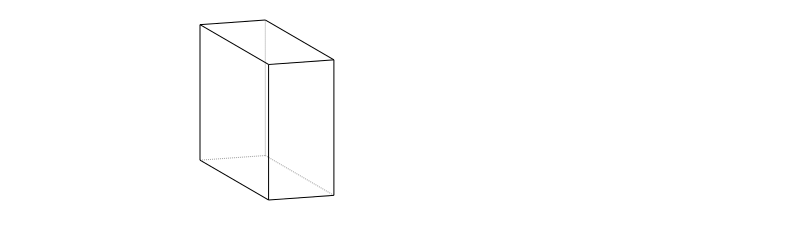

In [2]:
if __name__ == "__main__":
    display(SVG(cq.Workplane("XY").box(1, 2, 3).toSvg()))

## Reusable geometry
Defining _geometry as functions_ which accept and return `cadquery.CQ` objects provides a nice API for you and others to reuse geometry. Geometry can even mean _negative space_, like `hole`s.

In [3]:
def make_a_box_with_a_hole(box_size=1, hole_width=0.5, hole_face="Z", part=None):
    if part is None:
        part = cq.Workplane("XY") 
    return (part                     # work on the XY Plane
            .box(*([box_size] * 3))  # make the box
            .faces(hole_face)        # select the faces parallel to X
            .hole(hole_width)        # bore out a hole
           )

### IPython.display.SVG
With rich outputs like `IPython.display.SVG`, we can view a high-quality, static version of the part.

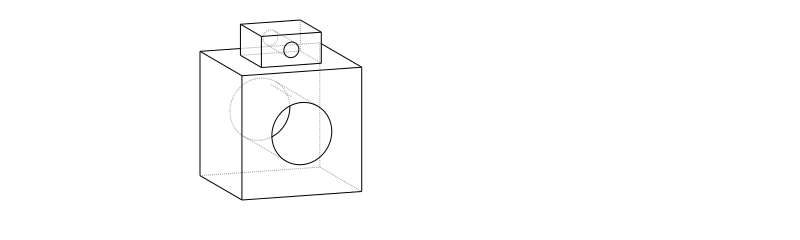

In [4]:
if __name__ == "__main__":
    part = make_a_box_with_a_hole()
    part = make_a_box_with_a_hole(0.5, 0.125, part=part.faces("Y"))
    display(SVG(part.toSvg()))

### ipywidgets.interact
With `ipywidgets.interact`, we can quickly inspect the resulting part.

In [5]:
if __name__ == "__main__":
    faces = "Z X Y |X |Y |Z <X <Y <Z".split(" ")
    part = None
    @W.interact
    def blockhole(box_size=(0.1, 5), hole_size=(0.1, 5), hole_face=faces, 
                  block_face=faces,
                  box_size2=(0.1, 5), hole_size2=(0.1, 5), hole_face2=faces, 
                 ):
        global part
        try: 
            _part = make_a_box_with_a_hole(box_size, hole_size, hole_face)
            _part = make_a_box_with_a_hole(box_size2, hole_size2, hole_face2, part=_part.faces(block_face))
            display(SVG(_part.toSvg()))
            part = _part
        except Exception as err: print(err)

interactive(children=(FloatSlider(value=2.5500000000000003, description='box_size', max=5.0, min=0.1), FloatSl…

## I've been working on the Workplane

The `cadquery.Workplane` workflow is very powerful, and can describe complex geometry with very little intermediate naming. This is derived from the [OCC Bottle Example](https://dcowden.github.io/cadquery/examples.html#the-classic-occ-bottle).

In [6]:
def make_a_bottle_with_a_hole(length=20.0, width=6.0, extent=3.0, height=20.0, neck_width=2, neck_height=3.0, shell=0.5):
    p = (cq.Workplane("XY")
         .center(-length / 2.0, 0)
         .vLine(width / 2.0)
         .threePointArc((length / 2.0, width / 2.0 + extent), (length, width / 2.0))
         .vLine(-width / 2.0)
         .mirrorX().extrude(height, True)
    )
    (p.faces(">Z").workplane()
     .circle(neck_width)
     .extrude(neck_height, True)
    )
    return p.faces(">Z").shell(shell)

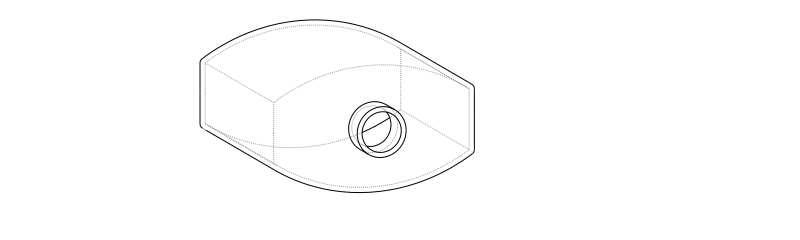

In [7]:
if __name__ == "__main__":
    part = make_a_bottle_with_a_hole()
    display(SVG(part.toSvg()))

## An interactive, parametric OCC bottle

In [8]:
if __name__ == "__main__":
    part = None
    @W.interact
    def interactively_make_a_bottle(
       length=(0.1, 20.0),
       width=(0.1, 10.0),
       extent=(0.1, 6.0),
       height=(0.1, 40.0),
       neck_width=(0.1, 3.0),
       neck_height=(0.1, 6.0),
       shell=(0.01, 1.0),
    ):
        global part
        try:
            _part = make_a_bottle_with_a_hole(length, width, extent, height, neck_width, neck_height, shell)
            display(SVG(_part.toSvg()))
            part = _part
        except Exception as err: 
            print("🤷 Error", err, "... here's the last thing that worked")
            if part:
                display(SVG(part.toSvg()))

interactive(children=(FloatSlider(value=10.049999999999999, description='length', max=20.0, min=0.1), FloatSli…